In [1]:
import thermal_shift as ts
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def boltzman_sigmoidal_sim(x, bottom, top, v50, slope, error):
    '''
    Boltzman Sigmoidal equation
    '''
    initial = bottom + (top - bottom) / (1 + np.exp((v50 - x) / slope))
    noise = [i + i*e for i, e in zip(initial, error)]
    shaped = []
    for i, n in enumerate(noise):
        if i < v50[0]:
            shaped.append(n + np.random.normal(i*.01, 0.01, 1)[0]*(i-v50[0]))
        elif i > v50[0]:
            shaped.append(n - np.random.normal(i*.03, 0.01, 1)[0]*(i-v50[0]))
        else:
            shaped.append(n)
    return shaped

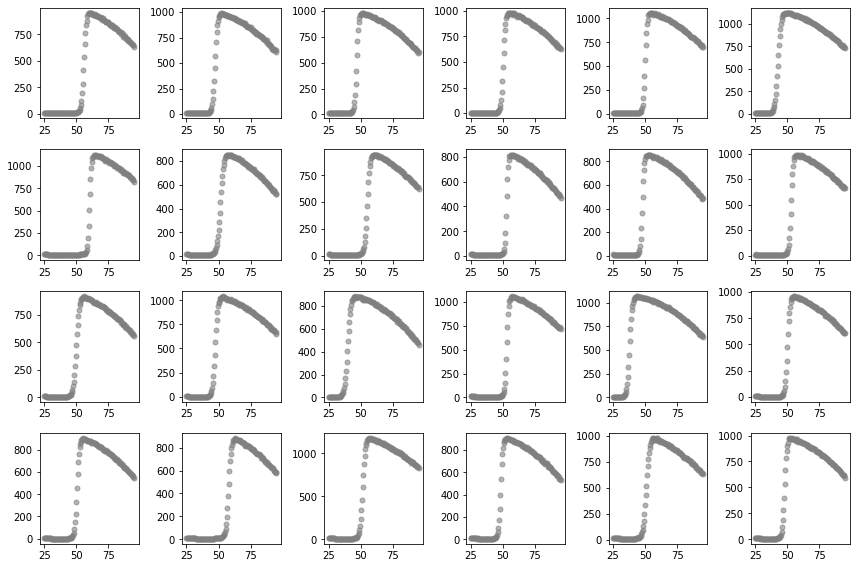

In [3]:
bottom = np.random.normal(10, 5, 384)
top = np.random.normal(1000, 100, 384)
v50 = np.random.normal(50, 5, 384)
slope = np.random.normal(1, 0.2, 384)

x = np.linspace(25, 95, 141)

df = pd.DataFrame()
fig, ax = plt.subplots(4, 6, figsize=(12, 8))
count = 0
for i in range(4):
    for j in range(6):
        s = 'Sample ' + str(count + 1)
        b = np.repeat(bottom[count], 141)
        t = np.repeat(top[count], 141)
        v = np.repeat(v50[count], 141)
        s = np.repeat(slope[count], 141)
        e = np.random.normal(0, .005, 141)
        y = boltzman_sigmoidal_sim(x, b, t, v, s, e)
        ax[i][j].scatter(x, y, c='grey', alpha=0.6, s=25)
        count+=1
plt.tight_layout()
plt.show()
plt.close()

In [4]:
bottom = np.random.normal(10, 5, 384)
top = np.random.normal(1000, 100, 384)
v50 = np.random.normal(50, 5, 384)
slope = np.random.normal(1, 0.2, 384)

x = np.linspace(25, 95, 141)

df = pd.DataFrame()
df['Temperature'] = x
for count in range(384):
    n = 'Sample ' + str(count + 1)
    b = np.repeat(bottom[count], 141)
    t = np.repeat(top[count], 141)
    v = np.repeat(v50[count], 141)
    s = np.repeat(slope[count], 141)
    e = np.random.normal(0, .005, 141)
    y = boltzman_sigmoidal_sim(x, b, t, v, s, e)
    df[n] = y
df

Temperature    Sample 1    Sample 2    Sample 3    Sample 4    Sample 5  \
0           25.0   13.001103    8.081440   15.436143   10.544667   12.896271   
1           25.5   11.702898    7.509602   15.830994   10.901420   12.512772   
2           26.0   12.031950    6.877858   16.084789    9.735092   11.073447   
3           26.5   12.133084    7.513145   14.769817   10.776643   10.324980   
4           27.0   11.065221    6.335590   14.213342    8.581583   10.762860   
..           ...         ...         ...         ...         ...         ...   
136         93.0  636.321421  739.709736  746.040368  665.851008  741.047528   
137         93.5  631.242203  721.523572  742.524117  665.841674  725.332548   
138         94.0  624.860680  723.226420  739.928160  653.349739  731.449856   
139         94.5  609.257020  718.461874  734.068501  663.867815  716.171020   
140         95.0  604.986990  717.364473  726.664431  637.634303  701.778633   

       Sample 6    Sample 7    Sample 8    Sample 9  ...  Sample 375  \
0      8.219407   15.323850    9.146501    6.928499  ...   15.517532   
1      6.923261   14.658034    8.276763    6.298503  ...   13.524343   
2      6.010647   14.156591    8.635311    6.187468  ...   14.069666   
3      6.356055   13.658496    7.916832    5.339068  ...   12.659584   
4      5.300960   12.632326    6.452506    6.027230  ...   12.484820   
..          ...         ...         ...         ...  ...         ...   
136  770.330577  767.960930  577.571279  666.080201  ...  694.993986   
137  773.432070  765.627406  575.351151  652.053779  ...  684.879855   
138  768.259411  763.103167  556.629306  656.930316  ...  677.881043   
139  757.223084  755.865669  556.663438  657.632422  ...  680.663555   
140  743.062719  737.697086  543.717950  639.143666  ...  669.284397   

     Sample 376  Sample 377  Sample 378  Sample 379  Sample 380  Sample 381  \
0     10.083569    3.233929   18.999820   10.832847   10.296990    2.068651   
1      9.461048    2.852158   17.745101   10.265674   10.108858    0.384775   
2      7.869076    3.549937   17.666656    9.217721    9.128448    1.196015   
3      8.491499    3.153306   16.237518    9.412478    9.642773   -0.147331   
4      8.751196    1.462749   16.667069    8.753181    8.533141   -0.200181   
..          ...         ...         ...         ...         ...         ...   
136  744.323770  623.557159  693.299731  651.674757  713.470117  600.065829   
137  745.680961  618.255307  677.912846  643.933378  701.156677  594.942747   
138  729.582693  620.157074  691.015331  634.531782  689.714747  583.711593   
139  729.698133  613.543800  663.728965  629.116480  690.703338  576.161195   
140  722.825573  598.238507  668.081130  617.540034  679.181286  564.280856   

     Sample 382  Sample 383  Sample 384  
0     10.768530    2.100698    4.753938  
1     10.633672    1.762037    5.059262  
2     10.433431    1.367911    3.753826  
3      9.547712    1.115219    3.534173  
4      9.149649    0.337199    2.508929  
..          ...         ...         ...  
136  677.100323  698.592112  714.677255  
137  661.999071  692.456761  710.021759  
138  655.427561  684.560580  710.744218  
139  652.554922  678.597008  687.356443  
140  642.419638  677.970602  682.486737  

[141 rows x 385 columns]

In [5]:
df.to_csv('./test_data/test.csv', index=False)